In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(tm)          # text analytics sentiment
library(syuzhet)
library(lubridate)
library(ggplot2)
library(scales)
library(reshape2)
library(dplyr)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input/")

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.1          ✔ dplyr   1.0.0     
✔ tidyr   1.1.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


The following object is masked from ‘package:httr’:

    content



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘scales’


The following object is masked from ‘package:syuzhet’:

    rescale


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching

[1] "sentiment-analysis-car-reviews"

In [2]:
car_reviews <- read.csv("../input/sentiment-analysis-car-reviews/Car_Reviews_Database.csv")

In [3]:
dim(car_reviews)

[1] 278   3

In [4]:
# Create corpus
corpus <- iconv(car_reviews$Review)
corpus <- Corpus(VectorSource(corpus))
inspect(corpus[1:5])



<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] <NA>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
[2] 2009 Honda Accord EX-L 4  : This car is very comfortable & sporty for 4 cylinders! It has the best transmission of

In [5]:

#Clean text
corpus <- tm_map(corpus, tolower)
inspect(corpus[1:5])

corpus <- tm_map(corpus, removePunctuation)
inspect(corpus[1:5])

corpus <- tm_map(corpus, removeNumbers)
inspect(corpus[1:5])

corpus <- tm_map(corpus, removeWords, stopwords("english"))
inspect(corpus[1:5])

corpus <- tm_map(corpus, removeWords, c("car", "cars", "can", "yukon", "sedan", "chevorlet"
                                        , "bentley", "mpg", "buick", "mulsanne"))


corpus <- tm_map(corpus, stripWhitespace)
inspect(corpus[1:5])





Warning message in tm_map.SimpleCorpus(corpus, tolower):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] <NA>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
[2] 2009 honda accord ex-l 4  : this car is very comfortable & sporty for 4 cylinders! it has the best transmission of

Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] <NA>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
[2] 2009 honda accord exl 4   this car is very comfortable  sporty for 4 cylinders it has the best transmission of any car ive had for 4

Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] <NA>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
[2]  honda accord exl    this car is very comfortable  sporty for  cylinders it has the best transmission of any car ive had for  years which were 

Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("english")):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] <NA>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
[2]  honda accord exl     car   comfortable  sporty   cylinders    best transmission   car ive    years     cars                                                                                                                                                                                                                                                                 

Warning message in tm_map.SimpleCorpus(corpus, removeWords, c("car", "cars", "can", :
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] <NA>                                                                                                                                                                                                                                                                                                                                                                                                                                                      
[2]  honda accord exl comfortable sporty cylinders best transmission ive years                                                                                                                                                                                                                                                                                                                                                                                
[3]  o

In [6]:
car_reviews_final <- corpus


In [7]:
#Term document matrix
tdm <- TermDocumentMatrix(car_reviews_final)
tdm <- as.matrix(tdm)
tdm[1:100, 1:5]



,1,2,3,4,5
accord,0,1,0,1,0
best,0,1,0,0,0
comfortable,0,1,0,0,0
cylinders,0,1,0,0,0
exl,0,1,0,0,0
honda,0,1,4,1,1
ive,0,1,0,0,0
sporty,0,1,0,0,0
transmission,0,1,0,0,1
years,0,1,1,0,0


comfortable transmission      driving         just         like        seats 
          36           25           36           34           57           42 
     vehicle         will         rear         even          get         good 
          34           35           38           31           25           47 
        ride        drive       engine          one         well    luxurious 
          25           46           55           38           34           27 
       model        cabin     interior        great     handling        miles 
          41           28           50           47           42           28 
        also          new         ford 
          39           37           30

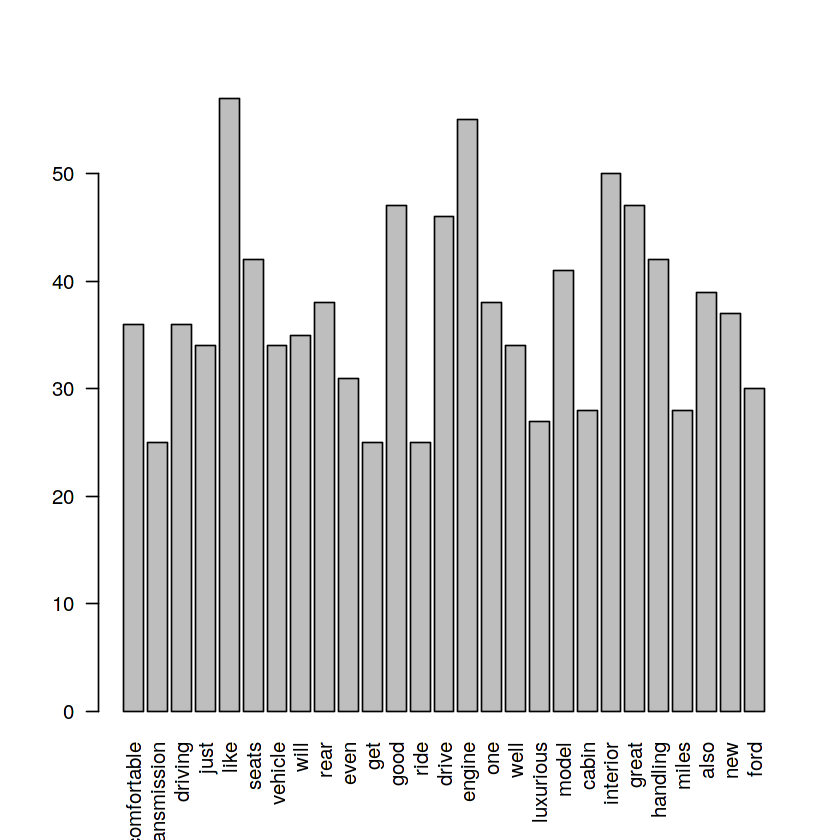

In [8]:
#Bar plot

w <- rowSums(tdm)
w <- subset(w, w>=25)
w
barplot(w, las = 2)



Loading required package: RColorBrewer

Warning message in brewer.pal(25, "Dark2"):
“n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
”


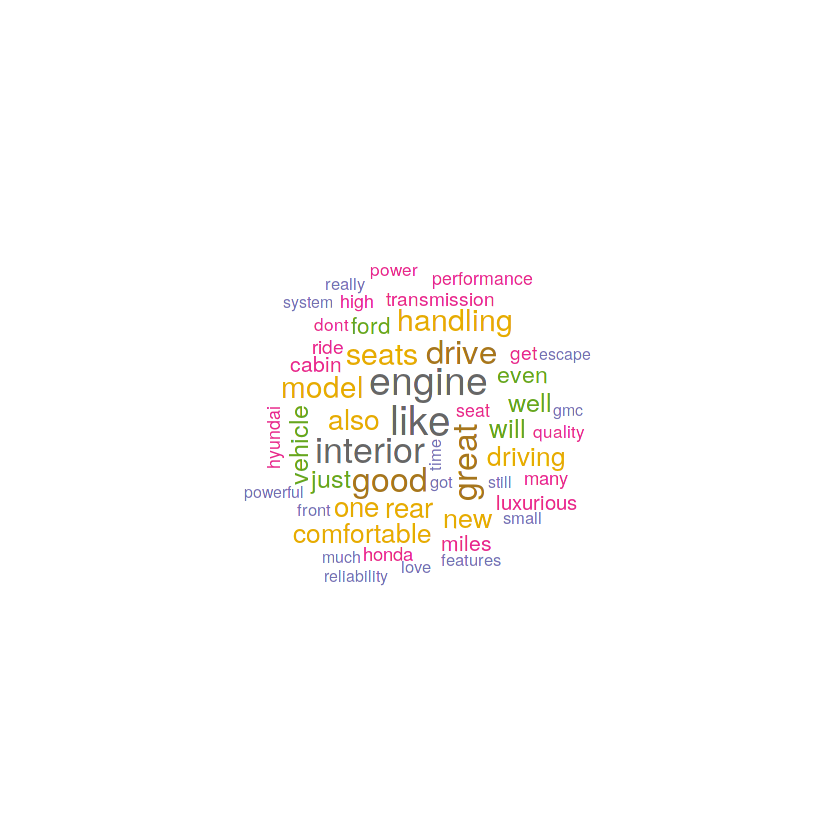

In [9]:
# Word Cloud
library(wordcloud)
w <- sort(rowSums(tdm), decreasing = T)
set.seed(2000)
wordcloud(words = names(w), 
          freq = w, 
          max.words = 50, 
          random.order = F, 
          min.freq = 5,
          colors = brewer.pal(25,"Dark2"),
          scale = c(2,0.1))




In [10]:

#obtain sentiment scores
sentiment_data <- iconv(car_reviews$Review)

s <- get_nrc_sentiment(sentiment_data)
s





Warning message:
“`filter_()` is deprecated as of dplyr 0.7.0.
Please use `filter()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
Warning message:
“`group_by_()` is deprecated as of dplyr 0.7.0.
Please use `group_by()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
Warning message:
“`data_frame()` is deprecated as of tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,1,0,1
1,1,0,2,0,1,0,0,6,2
0,1,0,0,1,0,0,2,1,3
0,0,0,0,0,0,1,0,0,0
0,1,0,1,0,1,1,2,1,0
1,2,0,0,1,0,1,3,1,3
0,1,0,0,0,0,0,3,0,3
4,1,4,3,2,4,1,3,7,6


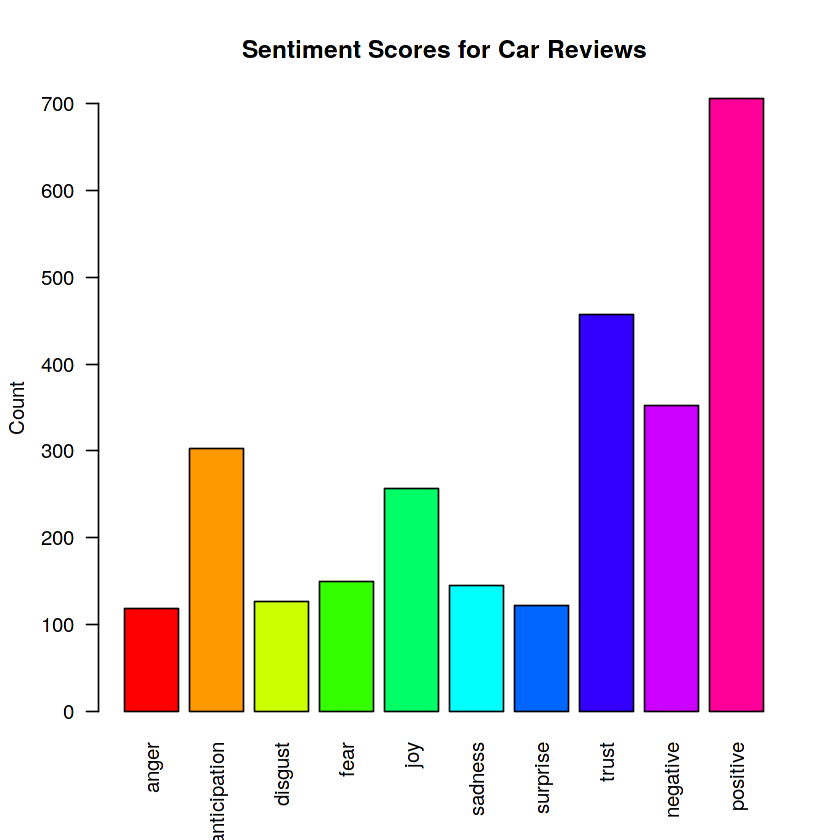

In [11]:
# Bar plot
barplot(colSums(s),
        las = 2,
        col = rainbow(10),
        ylab = 'Count',
        main = 'Sentiment Scores for Car Reviews')
       